In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
match_data = pd.read_csv('..\\Data\\matchData.csv')

In [8]:
game_duration = match_data['gameDuration']
match_data = match_data.drop(['gameDuration'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(match_data, game_duration, test_size=0.2, random_state=42)

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [11]:
predictions = rf.predict(X_test)

Métricas de evaluación

In [20]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
# root mean squared error
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')
#calcula el coeficiente de determinacion
r2 = rf.score(X_test, y_test)
print(f'Coefficient of Determination: {r2}')

Mean Squared Error: 65147.90833158109
Root Mean Squared Error: 255.2408829548689
Coefficient of Determination: 0.649530983697133


In [13]:
# calcula la media de la duracion de las partidas
mean_duration = game_duration.mean()
print(f'Mean Duration: {mean_duration}')

Mean Duration: 1471.433468215402


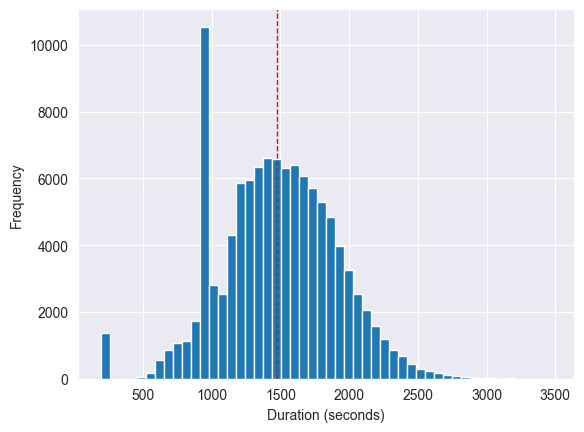

In [18]:
# grafica la distribucion de la duracion de las partidas
plt.ylabel('Frequency')
plt.xlabel('Duration (seconds)')
plt.hist(game_duration, bins=50)
plt.axvline(mean_duration, color='r', linestyle='dashed', linewidth=1)
plt.show()

                 Feature  Importance
2        firstBaronTeam1    0.359035
17       firstBaronTeam2    0.169080
19  firstRiftHeraldTeam2    0.026490
3       firstDragonTeam1    0.026367
30             win_team1    0.020871
31             win_team2    0.018904
14           champ5Team1    0.018198
13           champ4Team1    0.018169
28           champ4Team2    0.018097
12           champ3Team1    0.018062
25           champ1Team2    0.018042
27           champ3Team2    0.018001
26           champ2Team2    0.017983
29           champ5Team2    0.017934
10           champ1Team1    0.017784
11           champ2Team1    0.017750
5              ban1Team1    0.016012
21             ban2Team2    0.015938
22             ban3Team2    0.015799
9              ban5Team1    0.015790
6              ban2Team1    0.015756
7              ban3Team1    0.015665
20             ban1Team2    0.015625
8              ban4Team1    0.015545
23             ban4Team2    0.015514
18      firstDragonTeam2    0.015489
2

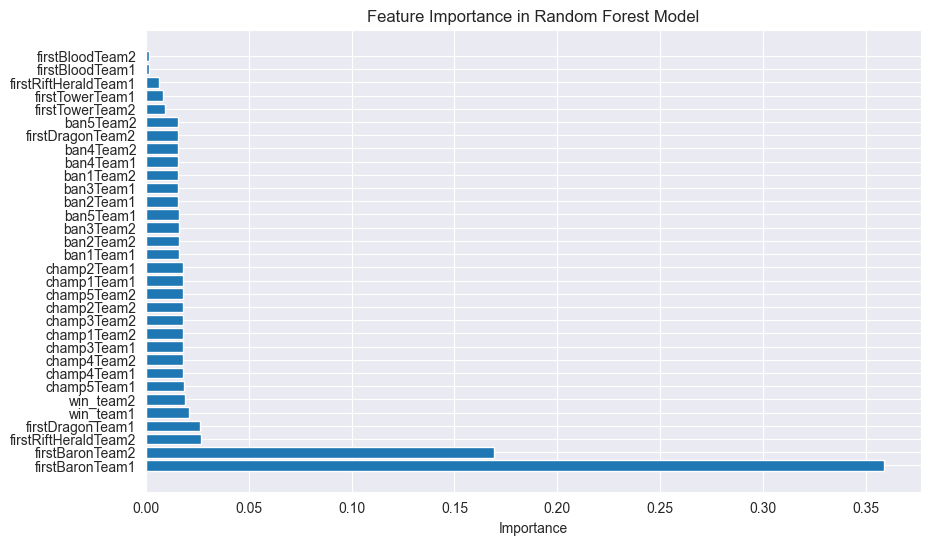

In [23]:
# Obtiene la importancia de cada característica
importances = rf.feature_importances_

# Obtiene los nombres de las características
feature_names = X_train.columns

# Crea un DataFrame con las importancias y los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordena el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Muestra o guarda la importancia de cada característica
print(feature_importance_df)

# Visualiza la importancia de cada característica
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()